<a href="https://colab.research.google.com/github/florencia-cicarone/tp3-HPC/blob/main/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este cuaderno vamos a realizar la adición de dos imágenes. Para esto lo primero que debemos asegurarnos es que las dos imágenes tengan el mismo tamaño, de no ser asi convertiremos la más chica al tamaño de la más grande. Una vez que tenemos las dos imágenes del mismo tamaño se realiza la sumatoria para cada uno de los 3 canales RGB que representan a los colores R (rojo)-G(verde)-B(azul).
La ecuación que utilizamos para realizar la adición de dos imágenes es la siguiente:

**<center> R = (pixel_R1 / 2) + (pixel_R2 / 2) </center>**
**<center> G = (pixel_G1 / 2) + (pixel_G2 / 2) </center>**
**<center> B = (pixel_B1 / 2) + (pixel_B2 / 2) </center>**

Siendo pixel_R1, pixel_G1, pixel_B1 los canales correspondientes a la primer imágen y pixel_R2, pixel_G2, pixel_B2 los correspondientes a la segunda.

Se utilizo la división por dos en cada canal para evitar desbordes y mejorar la saturación de la imágen final. Y asi mismo logran un mejor efecto con un 50% de cada imágen.
    

# Armado del ambiente

Toma la dirección web de dos imagenes con acceso público en internet, las deja disponible al contexto de ejecución del cuaderno Colab.

In [2]:
#@markdown ### Ingrese la dirección URL de la primer imágen
url_imagen1 = "https://fondosmil.com/fondo/88208.jpg" #@param {type:"string"}

#@markdown ---
#@markdown ### Ingrese la dirección URL de la segunda imágen
url_imagen2 = "https://www.wallpapertip.com/wmimgs/77-776836_fondos-de-pantalla-hd-para-pc.jpg" #@param {type:"string"}
#url_imagen2 = "https://s11.favim.com/orig/7/759/7598/75985/pink-aesthetic-sunglasses-Favim.com-7598576.jpg" #@param {type:"string"}


#Leo las imagenes desde internet.
!wget {url_imagen1} -O imagen1.jpg
!wget {url_imagen2} -O imagen2.jpg

--2021-06-24 01:53:04--  https://fondosmil.com/fondo/88208.jpg
Resolving fondosmil.com (fondosmil.com)... 107.150.40.186
Connecting to fondosmil.com (fondosmil.com)|107.150.40.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [image/jpeg]
Saving to: ‘imagen1.jpg’

imagen1.jpg         100%[===================>]  85.72K  --.-KB/s    in 0.1s    

2021-06-24 01:53:05 (709 KB/s) - ‘imagen1.jpg’ saved [87776/87776]

--2021-06-24 01:53:05--  https://www.wallpapertip.com/wmimgs/77-776836_fondos-de-pantalla-hd-para-pc.jpg
Resolving www.wallpapertip.com (www.wallpapertip.com)... 204.12.221.198
Connecting to www.wallpapertip.com (www.wallpapertip.com)|204.12.221.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206472 (202K) [image/jpeg]
Saving to: ‘imagen2.jpg’

imagen2.jpg         100%[===================>] 201.63K  1.01MB/s    in 0.2s    

2021-06-24 01:53:06 (1.01 MB/s) - ‘imagen2.jpg’ saved [206472/206472]



# Desarrollo CPU

Imagen1: imagen1.jpg -RGB- [768, 1024]
Imagen2: imagen2.jpg -RGB- [768, 1024]
Imagen resultado: - [768, 1024]
Tiempo de conversión de imagen: 17567.104 [ms]
Tiempo Total: 17736.631 [ms]


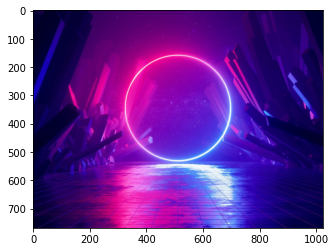

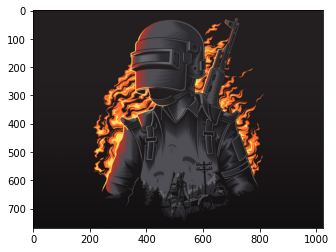

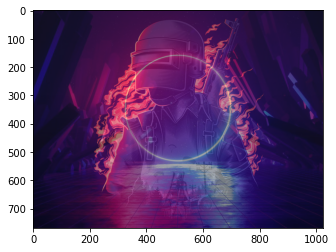

In [3]:
%matplotlib inline
from datetime import datetime

tiempo_total = datetime.now()

import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------


img1_nombre = 'imagen1.jpg'
image1 = Image.open( img1_nombre ) 

img2_nombre = 'imagen2.jpg'
image2 = Image.open( img2_nombre ) 

# Optengo las proporsiones de la imagen. 
img1_alto, img1_ancho = image1.size 
img2_alto, img2_ancho = image2.size 

# Si las imagenes no son del mismo tamaño, convierto la mas chica al tamaño de la mas grande
if image1.size > image2.size :
  image2 = image2.resize((img1_alto,img1_ancho))
elif image1.size < image2.size :
  image1 = image1.resize((img2_alto,img2_ancho))

# Optengo la proporsion con la que quedaron ambas imagenes
imagenResultado_alto, imagenResultado_ancho = image1.size 

# Convierto la imagen comprimida en JPEG/PNG a array.
img1_pic_cpu = numpy.asarray(image1)
img2_pic_cpu = numpy.asarray(image2)

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
imgResultado_picR_cpu = numpy.empty_like( img1_pic_cpu)

# Muestro los atributos de la imagen y como se ve antes de la adición.
print("Imagen1: " + img1_nombre + " -" + image1.mode + "- [" + str(img1_ancho) + ", " + str(img1_alto ) + "]" )  
plt.figure()
imgplot1=plt.imshow( img1_pic_cpu )

print("Imagen2: " + img2_nombre + " -" + image2.mode + "- [" + str(img2_ancho) + ", " + str(img2_alto ) + "]" )  
plt.figure()
imgplot2=plt.imshow( img2_pic_cpu )

tiempo_img = datetime.now()

# Realizo la suma de ambas imagenes
for y  in range( 0, imagenResultado_alto ):
  for x in range( 0, imagenResultado_ancho ):
    pixel_R1, pixel_G1, pixel_B1 = img1_pic_cpu[x][y]
    pixel_R2, pixel_G2, pixel_B2 = img2_pic_cpu[x][y]
    R = (pixel_R1 / 2) + (pixel_R2 / 2)
    G = (pixel_G1 / 2) + (pixel_G2 / 2)
    B = (pixel_B1 / 2) + (pixel_B2 / 2)
    imgResultado_picR_cpu[x][y] = [R, G, B]

tiempo_img = datetime.now() - tiempo_img

# Muestro la imagen luego de realizar la suma de ambas.
print("Imagen resultado: " + "[" + str(imagenResultado_ancho) + ", " + str(imagenResultado_alto ) + "]" )  
plt.figure()
imgplot1 = plt.imshow( imgResultado_picR_cpu )

tiempo_total = datetime.now() - tiempo_total

print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )

# Desarrollo GPU

# Métricas

# Conclusiones

# Bibliografía